In [1]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', 50)



In [10]:
pop = pd.read_csv('../../data/interim/POPULATION_ESTIMATES_2013_to_2019.csv')
venues  = pd.read_csv('../../data/interim/CRYTO_VENUES_USA.csv')
venue_by_county = pd.read_csv('../../data/interim/VENUES_PER_COUNTY.csv')

In [11]:
pop.head(1)

,state,county,CENSUS_2010_POP,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,POP_ESTIMATE_2019,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,N_POP_CHG_2019,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Births_2019,Deaths_2013,...,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_DOMESTIC_MIG_2019,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
0,Alabama,Autauga,54571.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0,-227.0,166.0,-29.0,379.0,147.0,143.0,336.0,571.0,640.0,651.0,666.0,676.0,631.0,624.0,582.0,...,2.161534,1.862012,2.037449,1.490099,0.218816,0.127714,0.236887,-0.054492,-0.216933,-0.126214,-0.287248,-4.121042,1.842729,-1.949762,4.831664,1.06659,0.667129,4.84731,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062


In [12]:
pop['pop_estimate_avg'] = (pop['POP_ESTIMATE_2013'] + pop['POP_ESTIMATE_2014'] + pop['POP_ESTIMATE_2015'] + pop['POP_ESTIMATE_2016'] + pop['POP_ESTIMATE_2017'] + pop['POP_ESTIMATE_2018'] + pop['POP_ESTIMATE_2019']) / 7

In [16]:
pop_venue = pop.merge(venue_by_county, on=['state','county'], how='left')

In [21]:
pop_venue.sort_values(ascending=False, by='pop_estimate_avg').head(25)

,state,county,CENSUS_2010_POP,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,POP_ESTIMATE_2019,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,N_POP_CHG_2019,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Births_2019,Deaths_2013,...,R_NATURAL_INC_2018,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_DOMESTIC_MIG_2019,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019,pop_estimate_avg,num_venues
204,California,Los Angeles,9818605.0,9992484.0,10040072.0,10085416.0,10105708.0,10103711.0,10073906.0,10039107.0,57109.0,47588.0,45344.0,20292.0,-1997.0,-29805.0,-34799.0,130663.0,129430.0,128538.0,123692.0,120191.0,113565.0,112963.0,60092.0,...,4.710864,4.454728,3.324993,3.658844,4.266232,3.853574,3.155756,2.065160,2.093172,-4.593067,-5.965090,-6.469210,-7.838989,-9.020744,-9.735342,-10.024157,-1.268074,-2.306246,-2.202978,-3.985415,-5.864988,-7.670182,-7.930985,1.006291e+07,221.0
610,Illinois,Cook,5194675.0,5252875.0,5254675.0,5244088.0,5224272.0,5200821.0,5171960.0,5150233.0,13524.0,1800.0,-10587.0,-19816.0,-23451.0,-28861.0,-21727.0,69281.0,69244.0,69508.0,67795.0,65651.0,62945.0,61822.0,39870.0,...,4.179400,3.756954,3.169204,3.262416,3.375826,2.789167,3.429610,2.408226,2.254753,-6.136353,-8.676618,-10.916334,-11.848847,-12.622238,-12.169928,-10.232322,-2.967149,-5.414202,-7.540507,-9.059681,-9.192628,-9.761702,-7.977568,5.214132e+06,114.0
2623,Texas,Harris,4092459.0,4353187.0,4455994.0,4557846.0,4623960.0,4657972.0,4680045.0,4713325.0,90093.0,102807.0,101852.0,66114.0,34012.0,22073.0,33280.0,67611.0,70225.0,72306.0,73008.0,70997.0,67494.0,66937.0,23930.0,...,8.510586,8.253694,5.992377,7.816164,8.228679,7.737040,7.376697,5.562637,5.299270,4.773985,5.061765,3.925519,-3.635450,-9.782231,-9.376509,-6.483083,10.766362,12.877928,12.154198,4.101590,-2.405534,-3.813872,-1.183814,4.577476e+06,78.0
103,Arizona,Maricopa,3817117.0,4017723.0,4093648.0,4172905.0,4256143.0,4327184.0,4402403.0,4485414.0,70218.0,75925.0,79257.0,83238.0,71041.0,75219.0,83011.0,54624.0,54617.0,55663.0,54469.0,53268.0,52475.0,52722.0,27391.0,...,4.535610,4.432810,3.061055,3.592734,3.048671,3.401570,2.211730,1.300405,1.242150,7.666824,8.249160,9.499244,10.596214,8.978803,11.347845,12.933885,10.727879,11.841895,12.547914,13.997785,11.190533,12.648250,14.176034,4.250774e+06,77.0
222,California,San Diego,3095313.0,3209768.0,3248877.0,3280850.0,3306089.0,3321237.0,3333861.0,3338330.0,35433.0,39109.0,31973.0,25239.0,15148.0,12624.0,4469.0,43744.0,44247.0,44443.0,43367.0,42299.0,40673.0,40603.0,20731.0,...,5.410288,5.260941,4.286898,4.390704,5.174183,4.355893,3.095970,1.675407,2.018228,-0.255948,0.305637,-2.566723,-3.426478,-4.752445,-3.250140,-5.914399,4.030950,4.696341,2.607460,0.929415,-1.656475,-1.574733,-3.896171,3.291287e+06,88.0
215,California,Orange,3010232.0,3104950.0,3126537.0,3149280.0,3164986.0,3174289.0,3175973.0,3175692.0,26882.0,21587.0,22743.0,15706.0,9303.0,1684.0,-281.0,37621.0,37892.0,38567.0,37862.0,37737.0,36744.0,36406.0,18770.0,...,4.943103,4.687905,3.121130,3.592722,4.138425,3.669152,2.987092,1.885591,1.945317,-0.355490,-2.772693,-3.050121,-4.454991,-5.692449,-6.304937,-6.725166,2.765640,0.820029,1.088305,-0.785840,-2.705357,-4.419345,-4.779849,3.153101e+06,73.0
362,Florida,Miami-Dade,2496435.0,2609692.0,2634269.0,2659839.0,2692213.0,2713295.0,2714854.0,2716940.0,33138.0,24577.0,25570.0,32374.0,21082.0,1559.0,2086.0,30756.0,31518.0,32082.0,32552.0,32515.0,31301.0,30789.0,18793.0,...,3.838878,3.350643,14.777163,15.043590,16.674764,19.950105,20.419912,15.375407,13.997585,-6.571227,-10.730820,-11.956688,-12.576485

In [27]:
pop_venue['pop_estimate_avg']

0        55217.000000
1       208316.857143
2        25785.142857
3        22505.285714
4        57649.857143
            ...      
3137     43958.714286
3138     23069.428571
3139     20595.285714
3140      8117.285714
3141      7074.428571
Name: pop_estimate_avg, Length: 3142, dtype: float64

Text(0, 0.5, 'Number of Venues')

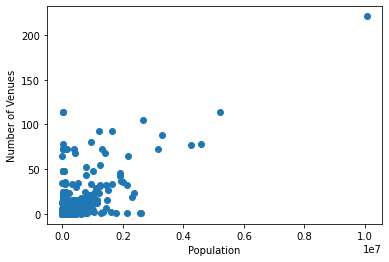

In [28]:
plt.scatter(pop_venue['pop_estimate_avg'], pop_venue['num_venues'])

plt.xlabel('Population')
plt.ylabel('Number of Venues')

In [29]:
pop_venue.corr()

,CENSUS_2010_POP,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,POP_ESTIMATE_2019,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,N_POP_CHG_2019,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Births_2019,Deaths_2013,Deaths_2014,Deaths_2015,...,R_NATURAL_INC_2018,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_DOMESTIC_MIG_2019,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019,pop_estimate_avg,num_venues
CENSUS_2010_POP,1.000000,0.999781,0.999596,0.999328,0.998998,0.998643,0.998238,0.997760,0.780958,0.726708,0.679349,0.589063,0.455494,0.251967,0.220506,0.991959,0.991525,0.990687,0.989741,0.989734,0.989520,0.989280,0.980215,0.980162,0.979807,...,0.172060,0.177020,0.287086,0.303023,0.292541,0.269601,0.252392,0.267063,0.251647,0.042002,0.049359,0.037053,0.026214,-0.000437,-0.008382,-0.001725,0.085439,0.100815,0.086788,0.072882,0.035941,0.028410,0.027238,0.999034,0.663029
POP_ESTIMATE_2013,0.999781,1.000000,0.999968,0.999863,0.999687,0.999463,0.999179,0.998825,0.793263,0.739784,0.693001,0.603223,0.469409,0.265869,0.234741,0.993022,0.992781,0.992137,0.991421,0.991490,0.991338,0.991182,0.978442,0.978593,0.978302,...,0.175499,0.180392,0.290416,0.306771,0.296379,0.273137,0.255920,0.270456,0.255094,0.045294,0.052440,0.039995,0.028462,0.001029,-0.006454,0.000135,0.089234,0.104518,0.090379,0.075747,0.037927,0.030814,0.029514,0.999701,0.664107
POP_ESTIMATE_2014,0.999596,0.999968,1.000000,0.999962,0.999851,0.999682,0.999451,0.999151,0.797839,0.745126,0.698592,0.609016,0.475246,0.271936,0.240899,0.993252,0.993098,0.992532,0.991909,0.992010,0.991890,0.991772,0.977823,0.978052,0.977795,...,0.176404,0.181293,0.291127,0.307714,0.297322,0.274041,0.256854,0.271427,0.255944,0.046607,0.054237,0.041511,0.029769,0.001999,-0.005246,0.001265,0.090653,0.106466,0.092054,0.077213,0.039040,0.032162,0.030753,0.999857,0.664280
POP_ESTIMATE_2015,0.999328,0.999863,0.999962,1.000000,0.999961,0.999855,0.999684,0.999444,0.802657,0.750761,0.704791,0.615495,0.481843,0.278787,0.247785,0.993403,0.993339,0.992857,0.992335,0.992477,0.992398,0.992324,0.977121,0.977439,0.977218,...,0.177340,0.182225,0.291853,0.308664,0.298343,0.275013,0.257869,0.272480,0.256841,0.048067,0.056012,0.043515,0.031348,0.003186,-0.003775,0.002641,0.092222,0.108394,0.094230,0.078965,0.040381,0.033785,0.032246,0.999959,0.664471
POP_ESTIMATE_2016,0.998998,0.999687,0.999851,0.999961,1.000000,0.999965,0.999862,0.999689,0.807086,0.756042,0.710653,0.622421,0.489224,0.286489,0.255405,0.993379,0.993401,0.992993,0.992579,0.992778,0.992766,0.992740,0.976578,0.976989,0.976816,...,0.178270,0.183170,0.292671,0.309700,0.299382,0.276127,0.259012,0.273685,0.257781,0.049477,0.057863,0.045410,0.033590,0.004763,-0.001967,0.004300,0.093756,0.110411,0.096300,0.081406,0.042135,0.035768,0.034030,0.999995,0.664671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_NET_MIG_2017,0.035941,0.037927,0.039040,0.040381,0.042135,0.044205,0.046009,0.047725,0.096658,0.122053,0.137750,0.181722,0.236027,0.217620,0.205625,0.026826,0.028169,0.029264,0.031551,0.033448,0.036003,0.037189,0.043668,0.045726,0.048018,...,-0.079912,-0.081618,-0.020233,-0.020782,-0.016658,-0.000694,0.018070,-0.006281,-0.046035,0.204656,0.244398,0.405493,0.503537,0.989721,0.516378,0.460432,0.201493,0.239486,0.402209,0.504740,1.000000,0.517946,0.459783,0.042532,0.036815
R_NET_MIG_2018,0.028410,0.030814,0.032162,0.033785,0.035768,0.037947,0.040444,0.042671,0.107